In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cursor = sqlite3.connect("/content/data_base.db")

(1) Query about how many employees are in each department.

In [8]:
query_loc = cursor.execute(
    """
    SELECT location, COUNT(1)
    FROM department
    GROUP BY location
    """
)

result_query_loc = query_loc.fetchall()

for loc, dep in result_query_loc:
  if dep > 1:
    print(f"The sector {loc} has {dep} departments.")
  else:
    print(f"The sector {loc} has {dep} department.")

#cursor.close()

The sector A has 4 departments.
The sector B has 3 departments.
The sector C has 1 department.


In [21]:
#Using print is a good way to display the result, but we may convert it in dataframe.

data_frame_1 = pd.DataFrame(result_query_loc, columns=["Sector", "Number of Employees"])
data_frame_1

,Sector,Number of Employees
0,A,4
1,B,3
2,C,1


(2) Query about time in the company.

In [10]:
#query_time_comp_1 displays how many employees have 10 or more year in the company.

query_time_comp_1 = cursor.execute(
    """
    SELECT COUNT(1)
    FROM employee
    WHERE time_in_company >= 10
    """
)

result_query_time_comp_1 = query_time_comp_1.fetchone()
print(f"There are {result_query_time_comp_1[0]} employees with 10 or more years in the company.")

#cursor.close()

There are 6 employees with 10 or more years in the company.


In [22]:
#query_time_comp_2 displays the list of employees with 10 or more years in the company.

query_time_comp_2 = cursor.execute(
    """
    SELECT code, name
    FROM employee
    WHERE time_in_company >=10
    """
)

result_query_time_comp_2 = query_time_comp_2.fetchall()
data_frame_2 = pd.DataFrame(result_query_time_comp_2, columns=["Code", "Employee"])
data_frame_2

#cursor.close()

,Code,Employee
0,9,Brenda Jimenez
1,21,Paola Lee
2,23,Noemi Guzmán
3,24,Johanan Hernández
4,26,Leonel Tiño
5,28,Rodolfo Estrada


In [20]:
#query_time_comp_3 grouby the employees who have 10 or more years by department.

query_time_comp_3 = cursor.execute(
    """
    SELECT department.name, COUNT(1)
    FROM employee
    INNER JOIN department ON department_code = department.code
    WHERE time_in_company >= 10
    GROUP BY department.name
    """
)

result_query_time_comp_3 = query_time_comp_3.fetchall()
data_frame_3 = pd.DataFrame(result_query_time_comp_3, columns=["Department", "Number of Employees"])
data_frame_3


#cursor.close()

,Department,Number of Employees
0,Management,5
1,Sales,1


(3) Query about education level of employees for each department.

In [19]:
query_educ_per_dep = cursor.execute(
    """
    SELECT education, department.name, COUNT(1)
    FROM employee
    INNER JOIN department ON department_code = department.code
    GROUP BY education, department.name
    """
)

result_query_educ_per_dep = query_educ_per_dep.fetchall()

data_frame_4 = pd.DataFrame(result_query_educ_per_dep, columns= ["Education level", "Department", "Number of Employees"])
data_frame_4

#cursor.close()

,Education level,Department,Number of Employees
0,Bachelor's degree,Accounting,2
1,Bachelor's degree,Data analytics,2
2,Bachelor's degree,Human Resources,1
3,Bachelor's degree,IT,1
4,Bachelor's degree,Management,2
5,Bachelor's degree,Marketing,1
6,Bachelor's degree,Procurement,2
7,Bachelor's degree,Sales,5
8,High School,Accounting,1
9,High School,Data analytics,1


(4) Query about employees who earn more than 10000 and group by other variable.

In [59]:
#Salary vs department.

query_earn_dep = cursor.execute(
    """
    SELECT employee.name, department.name, salary
    FROM employee
    INNER JOIN department ON department_code = department.code
    WHERE salary > 10000
    GROUP BY employee.name, department.name, salary
    """
)

result_query_earn_dep = query_earn_dep.fetchall()
data_frame_5 = pd.DataFrame(result_query_earn_dep, columns=["Employee", "Department", "Salary"])
data_frame_5

#cursor.close()

,Employee,Department,Salary
0,Brenda Jimenez,Sales,11000.0
1,Bruce Hernández,Management,20000.0
2,Fabiola Lee,Management,20500.0
3,Johanan Hernández,Management,20000.0
4,Leonel Tiño,Management,30500.0
5,Marcos Miranda,Management,31000.0
6,Noemi Guzmán,Management,35500.0
7,Paola Lee,Management,25500.0
8,Rodolfo Estrada,Management,40500.0


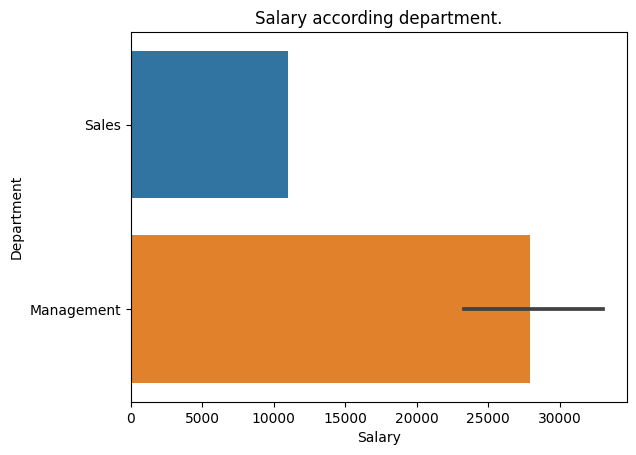

In [64]:
sns.barplot(x="Salary", y="Department", data=data_frame_5)
plt.title("Salary according department.")
plt.show()

In [60]:
#Salary vs education level.

query_earn_edu = cursor.execute(
    """
    SELECT name, education, salary
    FROM employee
    WHERE salary > 10000
    GROUP BY name, education, salary
    """
)

result_query_earn_edu = query_earn_edu.fetchall()
data_frame_6 = pd.DataFrame(result_query_earn_edu, columns=["Employee", "Education_level", "Salary"])
data_frame_6

#cursor.close()

,Employee,Education_level,Salary
0,Brenda Jimenez,Bachelor's degree,11000.0
1,Bruce Hernández,Bachelor's degree,20000.0
2,Fabiola Lee,Ph.D.,20500.0
3,Johanan Hernández,Ph.D.,20000.0
4,Leonel Tiño,Ph.D.,30500.0
5,Marcos Miranda,Bachelor's degree,31000.0
6,Noemi Guzmán,Ph.D.,35500.0
7,Paola Lee,Ph.D.,25500.0
8,Rodolfo Estrada,Ph.D.,40500.0


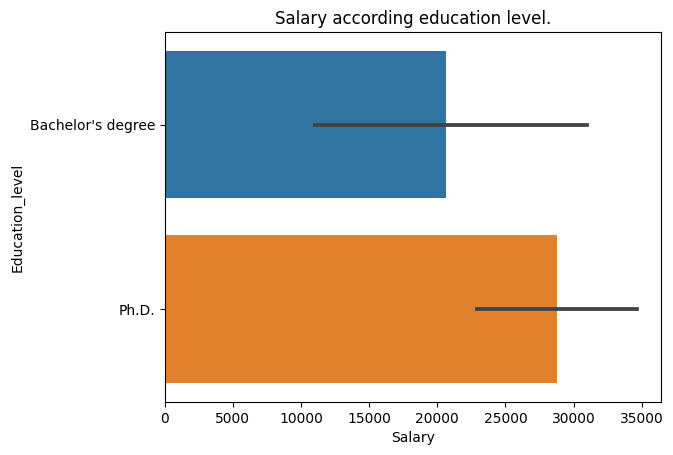

In [65]:
sns.barplot(x="Salary", y="Education_level", data=data_frame_6)
plt.title("Salary according education level.")
plt.show()

In [61]:
#Salary vs time in the company.

query_earn_time_comp = cursor.execute(
    """
    SELECT name, time_in_company, salary
    FROM employee
    WHERE salary > 10000
    GROUP BY name, time_in_company, salary
    """
)

result_query_earn_time_comp = query_earn_time_comp.fetchall()
data_frame_7 = pd.DataFrame(result_query_earn_time_comp, columns=["Employee", "Time_in_the_company", "Salary"])
data_frame_7

#cursor.close()

,Employee,Time_in_the_company,Salary
0,Brenda Jimenez,10,11000.0
1,Bruce Hernández,9,20000.0
2,Fabiola Lee,6,20500.0
3,Johanan Hernández,11,20000.0
4,Leonel Tiño,21,30500.0
5,Marcos Miranda,5,31000.0
6,Noemi Guzmán,17,35500.0
7,Paola Lee,12,25500.0
8,Rodolfo Estrada,20,40500.0


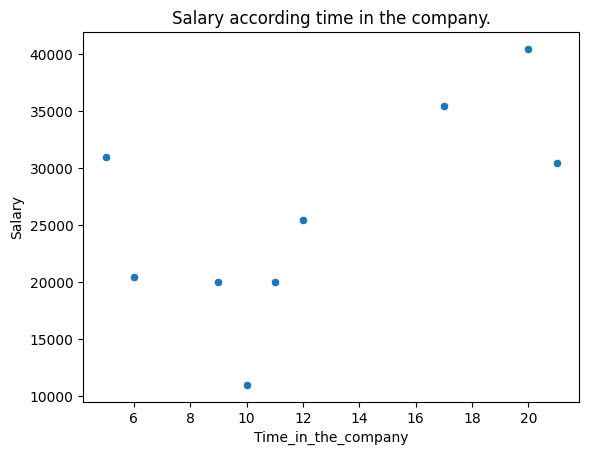

In [69]:
sns.scatterplot(x="Time_in_the_company", y="Salary", data=data_frame_7)
plt.title("Salary according time in the company.")
plt.show()

In [71]:
corr_time_salary = data_frame_7['Time_in_the_company'].corr(data_frame_7['Salary'])
print(f"The correlation between time in the company vs salary is {corr_time_salary}")

The correlation between time in the company vs salary is 0.6022967377508008


In [62]:
#Salary vs employee's age.

query_earn_age = cursor.execute(
    """
    SELECT name, age, salary
    FROM employee
    WHERE salary > 10000
    GROUP BY name, age, salary
    """
)

result_query_earn_age = query_earn_age.fetchall()
data_frame_8 = pd.DataFrame(result_query_earn_age, columns=["Employee", "Age", "Salary"])
data_frame_8

#cursor.close()

,Employee,Age,Salary
0,Brenda Jimenez,42,11000.0
1,Bruce Hernández,45,20000.0
2,Fabiola Lee,51,20500.0
3,Johanan Hernández,43,20000.0
4,Leonel Tiño,61,30500.0
5,Marcos Miranda,45,31000.0
6,Noemi Guzmán,50,35500.0
7,Paola Lee,53,25500.0
8,Rodolfo Estrada,65,40500.0


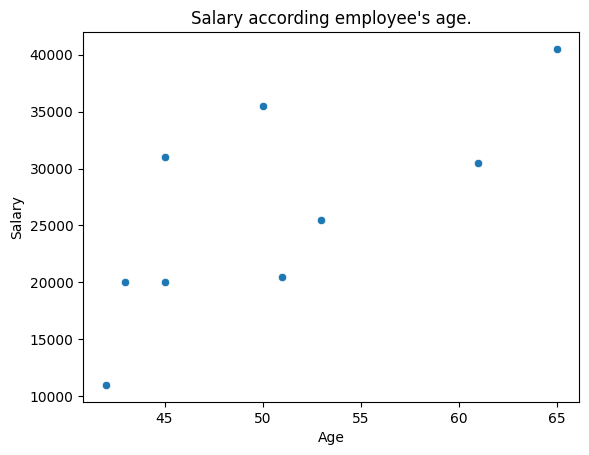

In [68]:
sns.scatterplot(x="Age", y="Salary", data=data_frame_8)
plt.title("Salary according employee's age.")
plt.show()

In [72]:
corr_age_salary = data_frame_8['Age'].corr(data_frame_8['Salary'])
print(f"The correlation between age vs salary is {corr_age_salary}")

The correlation between age vs salary is 0.7238485194989115
